# Project: Investigate a Dataset (TMDb_Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

<p> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.</p>
<p>● Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.</p>
<p>● There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.</p>
<p>● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.</p>

<ol>
<li><h3><a href="#Q1">Which movies earned most and lowest profit ?</a></h3></li>
<li><h3><a href="#Q2">which movies with largest and lowest budgets ?</a></h3></li>
<li><h3><a href="#Q3">Which movie genre the most popular ?</a></h3></li>
<li><h3><a href="#Q4">What is the most gerne of movie ?</a></h3></li>
<li><h3><a href="#Q5">What is the most gerne make profit ?</a></h3></li>
<li><h3><a href="#Q6">What is Top 10 movie popularity?</a></h3></li>
<li><h3><a href="#Q7">What is Top 10 movie popularity?</a></h3></li>      
<li><h3><a href="#Q8">Which year has the highest number of movie released ?</a></h3></li>      
<li><h3><a href="#Q9">What is the top 10 runtime movies ?</a></h3></li>      
<li><h3><a href="#Q10">Correlation.</a></h3></li>          
</ol>

In [3]:
# Import packages
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
● Loading data, exploring it to but my questoins and deleting the unsued data so that we can make our calculation easy and understandable. 

### General Properties

In [2]:
# Load Data
tmdb_data = pd.read_csv("tmdb_movies.csv")
tmdb_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Explore data coulmns titles.
tmdb_data.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [4]:
# Data Shape.
tmdb_data.shape

(10866, 21)

In [5]:
# Data info.
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# Data describe.
tmdb_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [61]:
# Insert genre column
tmdb_data["genre"] = tmdb_data["genres"].apply(lambda x : x.split("|")[0])

In [64]:
# Insert a profit column
tmdb_data.insert(2,'profit_earned',tmdb_data['revenue']-tmdb_data['budget'])

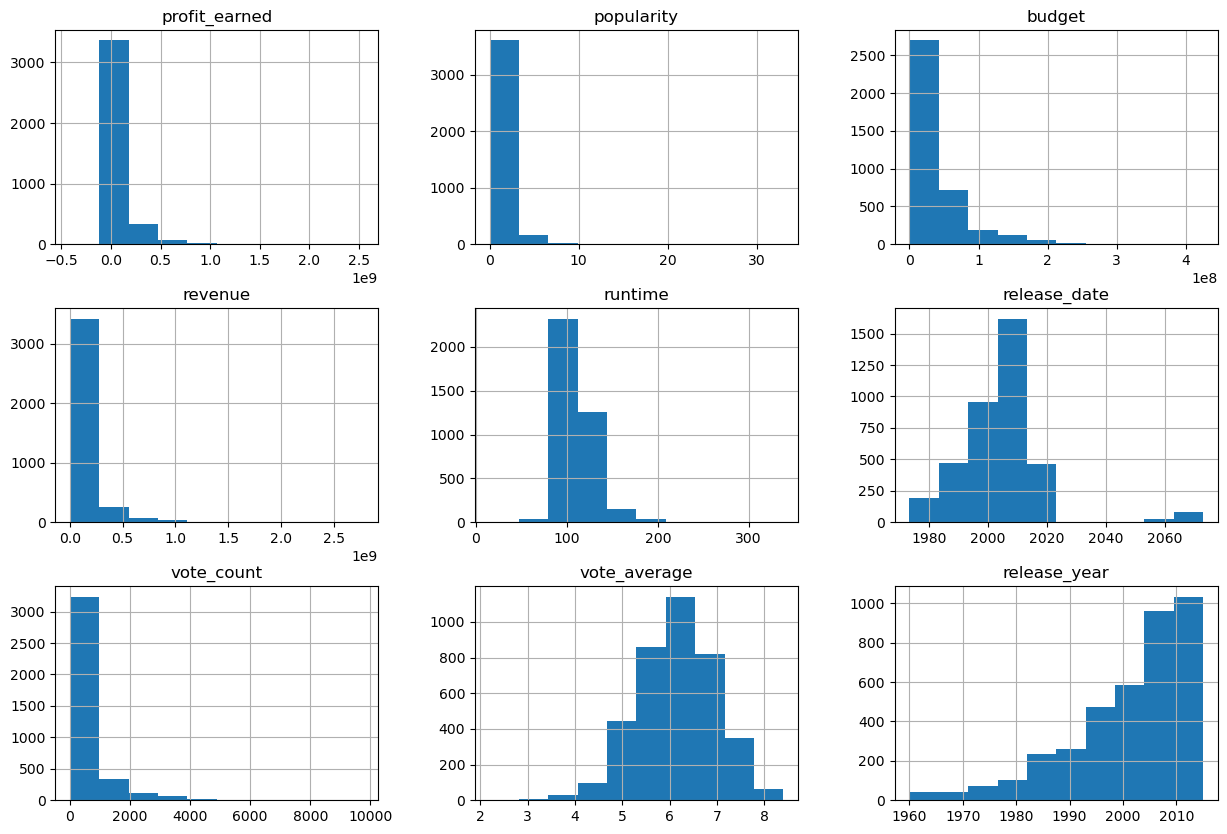

In [63]:
tmdb_data.hist(figsize=(15,10));

● Based on the question, I will delete the unsued data so that we can make our calculation easy and understandable. 

### Data Cleaning 

#### Deleting unused columns

In [24]:
# Drop unused data
tmdb_data.drop(labels = ['id','imdb_id','homepage','tagline' ,'keywords', 'budget_adj', 'revenue_adj'],axis =1,inplace =True)

In [26]:
tmdb_data.shape

(10866, 15)

#### Checking NaN values

In [27]:
# checking Nan
tmdb_data.isnull().sum()

profit_earned              0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [28]:
# Drop Nan
tmdb_data.dropna(inplace=True)
tmdb_data.isnull().sum().sum()

0

#### Check duplicates

In [29]:
# check duplicates
tmdb_data.duplicated().sum()

1

In [30]:
# remove duplicates
tmdb_data.drop_duplicates(inplace = True)
tmdb_data.duplicated().sum()

0

In [31]:
tmdb_data.shape

(9772, 15)

#### Removing missing value "0"

In [32]:
# Removing "0" from runtime, budget and revenue
tmdb_data[['runtime','budget','revenue']] = tmdb_data[['runtime','budget','revenue']].replace(0, np.NAN)
tmdb_data.dropna(subset = ['runtime','budget','revenue'], inplace = True)

In [33]:
tmdb_data.shape

(3805, 15)

#### Correcting data types

In [34]:
# Data types.
tmdb_data.dtypes

profit_earned             int64
popularity              float64
budget                  float64
revenue                 float64
original_title           object
cast                     object
director                 object
overview                 object
runtime                 float64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

In [35]:
# Correct data type of release date
tmdb_data['release_date'] = pd.to_datetime(tmdb_data['release_date'])

In [36]:
tmdb_data.dtypes

profit_earned                    int64
popularity                     float64
budget                         float64
revenue                        float64
original_title                  object
cast                            object
director                        object
overview                        object
runtime                        float64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

### Functions i used in my project.

In [37]:
# Find heigh and low profit. 
def profit(m):
    if m == "max":
        m_profit = tmdb_data["profit_earned"].max()
    elif m ==  "min":
        m_profit = tmdb_data["profit_earned"].min()
        
    mov_name = tmdb_data[tmdb_data["profit_earned"] == m_profit]["original_title"]
    print(mov_name)

In [38]:
# find heigh and low budget.
def budget(m):
    if m == "max":
        m_budget = tmdb_data["budget"].max()
    elif m == "min":
        m_budget = tmdb_data["budget"].min()
    
    mov_name = tmdb_data[tmdb_data["budget"] == m_budget]["original_title"]
    print(mov_name)

In [39]:
# bae chart
def bar_chart(x,y,chart_title,x_label,y_label):
    dx = x
    dy = y

    plt.figure(figsize=(10,5), dpi = 110)
    plt.bar(dx, dy, width=0.8)

    plt.xticks(dx,rotation="vertical",size="12")
    plt.title(chart_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.show()

In [40]:
# plot chart
def plot_chart(x, y, title, x_label, y_label):
    dx = x
    dy = y
 
    
    plt.figure(figsize=(10,5), dpi = 110)
    plt.plot(dx, dy, color= "r")

    plt.xticks(dx,rotation="vertical",size="12")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid()
    plt.show()

In [41]:
# Plot chart for years
def plot_chart_years(x, chart_title, x_label, y_label):
    plt.figure(figsize=(10,5), dpi = 120)

    plt.xlabel(x_label, fontsize = 11)
    plt.ylabel(y_label, fontsize = 11)
    plt.title(chart_title)
    
    plt.grid()

    plt.plot(x,color="g")

    plt.show()

In [42]:
# top 10
def top_ten(compare):
    top = tmdb_data.nlargest(10,compare)
    top_10 = top.loc[:,['original_title', compare]].head(10)
    return top_10

<a id='eda'></a>
## Exploratory Data Analysis

<a id='Q1'></a>
### Research Question 1 (Which movies earned most and lowest profit ?)

In [44]:
tmdb_data.head(2)

,profit_earned,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,1363528810,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,228436354,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015


In [45]:
profit("max")

1386    Avatar
Name: original_title, dtype: object


In [46]:
profit("min")

2244    The Warrior's Way
Name: original_title, dtype: object


<ul>
<li>Movie earned most profit is 'Avatar' .</li>
<li>Movie earned lowest profit is 'The Warrior's Way' .</li>
</ul>

<a id='Q2'></a>
### Research Question 2  (which movies with largest and lowest budgets ?)

In [47]:
budget("max")

2244    The Warrior's Way
Name: original_title, dtype: object


In [48]:
budget("min")

2618               Lost & Found
3581    Love, Wedding, Marriage
Name: original_title, dtype: object


<ul>
<li>Movie with most budget is 'The Warrior's Way' .</li>
<li>Movie with the lowest budget is 'Love, Wedding, Marriage' .</li>
</ul>

<a id='Q3'></a>
### Research Question 3  (Which movie genre the most popular ?)

In [49]:
tmdb_data.head()

,profit_earned,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,1363528810,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,228436354,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,185238201,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,1868178225,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,1316249360,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


In [65]:
# Group data by "genre".
genre = tmdb_data.groupby("genre").sum()
genre

C:\Users\Aboukhadra\AppData\Local\Temp\ipykernel_480\2566772358.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  genre = tmdb_data.groupby("genre").sum()


,profit_earned,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
genre,,,,,,,,
Action,57942210089,992.584576,3.561964e+10,9.356185e+10,75556.0,498346,4104.9,1368537
Adventure,49126371241,597.531365,2.268162e+10,7.180799e+10,35889.0,309220,1949.1,623618
Animation,20189949886,175.725995,8.203200e+09,2.839315e+10,9137.0,94492,643.9,202526
Comedy,41386905819,716.738856,2.057588e+10,6.196278e+10,79182.0,253762,4662.3,1551379
Crime,7768516539,183.806989,4.437899e+09,1.220642e+10,19640.0,76069,1104.7,341886
Documentary,512863197,8.149113,1.273981e+08,6.402613e+08,2404.0,2031,155.6,46133
Drama,35715444010,822.302983,2.187082e+10,5.758626e+10,103281.0,337362,5645.7,1753706
Family,6286487612,64.371782,2.415000e+09,8.701488e+09,3739.0,26712,244.0,80089
Fantasy,11467626332,173.871212,6.083050e+09,1.755068e+10,11419.0,76900,664.0,218066


In [66]:
# Find "popularity".
popularity =tmdb_data.groupby("genre").sum()["popularity"]
genre = [genre for genre, df in tmdb_data.groupby("genre")]

C:\Users\Aboukhadra\AppData\Local\Temp\ipykernel_480\1143514861.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  popularity =tmdb_data.groupby("genre").sum()["popularity"]


C:\Users\Aboukhadra\AppData\Local\Temp\ipykernel_480\4176809781.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  popularity =tmdb_data.groupby("genre").sum()["popularity"]


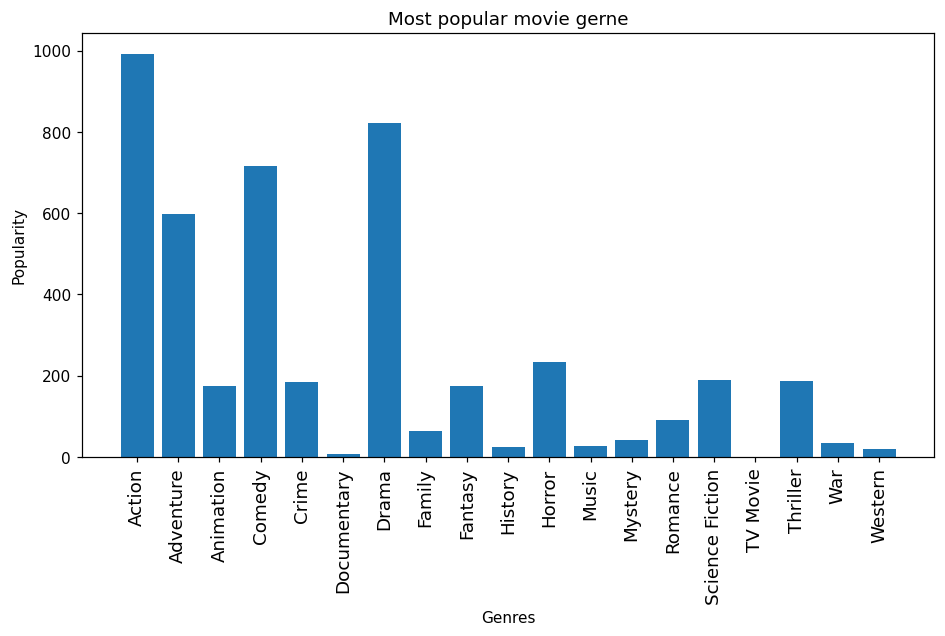

In [67]:
# Plot to show the most popular genre of movies.
popularity =tmdb_data.groupby("genre").sum()["popularity"]
genre = [genre for genre, df in tmdb_data.groupby("genre")]

bar_chart(genre,popularity,"Most popular movie gerne","Genres","Popularity")

<ul>
<li>The most popular genre of movies is 'Action'.</li>
</ul>

<a id='Q4'></a>
### Research Question 4  (What is the most gerne of movie ?)

In [68]:
# Group data by "genre".
genre = tmdb_data.groupby("genre").count()
genre

,profit_earned,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
genre,,,,,,,,,,,,,,,
Action,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684
Adventure,312,312,312,312,312,312,312,312,312,312,312,312,312,312,312
Animation,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101
Comedy,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775
Crime,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171
Documentary,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
Drama,876,876,876,876,876,876,876,876,876,876,876,876,876,876,876
Family,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40
Fantasy,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109


In [69]:
# Find movie name
movie_name = tmdb_data.groupby("genre").count()['original_title']
movie_name

genre
Action             684
Adventure          312
Animation          101
Comedy             775
Crime              171
Documentary         23
Drama              876
Family              40
Fantasy            109
History             17
Horror             272
Music               29
Mystery             36
Romance             65
Science Fiction     98
TV Movie             1
Thriller           160
War                 20
Western             16
Name: original_title, dtype: int64

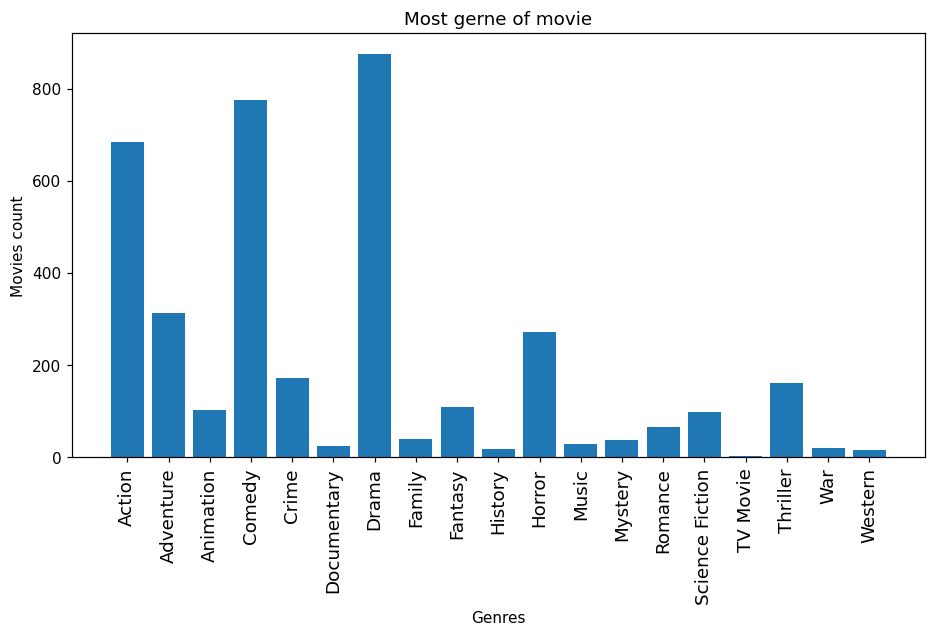

In [70]:
# Plot to show the most genre of movies.
x = [genre for genre, df in tmdb_data.groupby("genre")]
y = movie_name

bar_chart(x,y,"Most gerne of movie","Genres","Movies count")

<ul>
<li>The most gerne of movies is 'Drama'.</li>
</ul>

<a id='Q5'></a>
### Research Question 5  (What is the most gerne make profit ?)

In [71]:
# group data by "genre".
genre = tmdb_data.groupby("genre").sum()
genre

C:\Users\Aboukhadra\AppData\Local\Temp\ipykernel_480\780049778.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  genre = tmdb_data.groupby("genre").sum()


,profit_earned,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
genre,,,,,,,,
Action,57942210089,992.584576,3.561964e+10,9.356185e+10,75556.0,498346,4104.9,1368537
Adventure,49126371241,597.531365,2.268162e+10,7.180799e+10,35889.0,309220,1949.1,623618
Animation,20189949886,175.725995,8.203200e+09,2.839315e+10,9137.0,94492,643.9,202526
Comedy,41386905819,716.738856,2.057588e+10,6.196278e+10,79182.0,253762,4662.3,1551379
Crime,7768516539,183.806989,4.437899e+09,1.220642e+10,19640.0,76069,1104.7,341886
Documentary,512863197,8.149113,1.273981e+08,6.402613e+08,2404.0,2031,155.6,46133
Drama,35715444010,822.302983,2.187082e+10,5.758626e+10,103281.0,337362,5645.7,1753706
Family,6286487612,64.371782,2.415000e+09,8.701488e+09,3739.0,26712,244.0,80089
Fantasy,11467626332,173.871212,6.083050e+09,1.755068e+10,11419.0,76900,664.0,218066


In [72]:
# Find profits.
profits = genre["profit_earned"]
profits

genre
Action             57942210089
Adventure          49126371241
Animation          20189949886
Comedy             41386905819
Crime               7768516539
Documentary          512863197
Drama              35715444010
Family              6286487612
Fantasy            11467626332
History             1330827327
Horror             10929813014
Music               1312221627
Mystery             1498828933
Romance             4872342665
Science Fiction    11864682292
TV Movie              37000000
Thriller            7236340026
War                 1525512504
Western              541386506
Name: profit_earned, dtype: int64

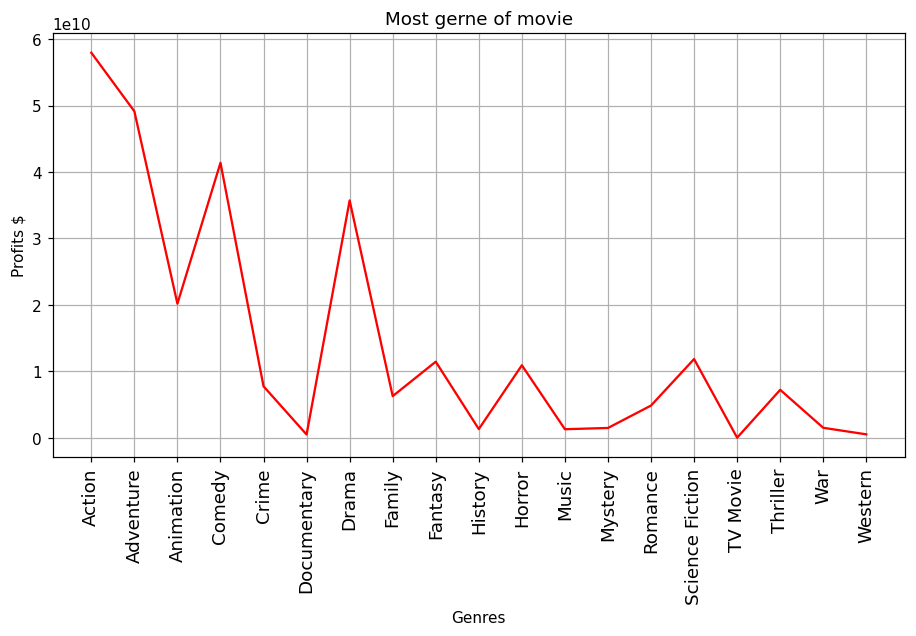

In [73]:
# Plot to show most genre of movies profits earned.
genre = [genre for genre, df in tmdb_data.groupby("genre")]
profit = profits

plot_chart(genre,profit,"Most gerne of movie","Genres","Profits $")



<ul>
<li>The most genre make profit is "Action".</li>
</ul>

<a id='Q6'></a>
### Research Question 6  (What is Top 10 movie popularity?) 

In [84]:
# Top 10 movies popularity
popular = tmdb_data.nlargest(10,'popularity')
top_10_popular = popular.loc[:,['original_title', 'popularity']].head(10)
top_10_popular

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507
631,Captain America: The Winter Soldier,12.971027
1329,Star Wars,12.037933
632,John Wick,11.422751
3,Star Wars: The Force Awakens,11.173104
633,The Hunger Games: Mockingjay - Part 1,10.739009


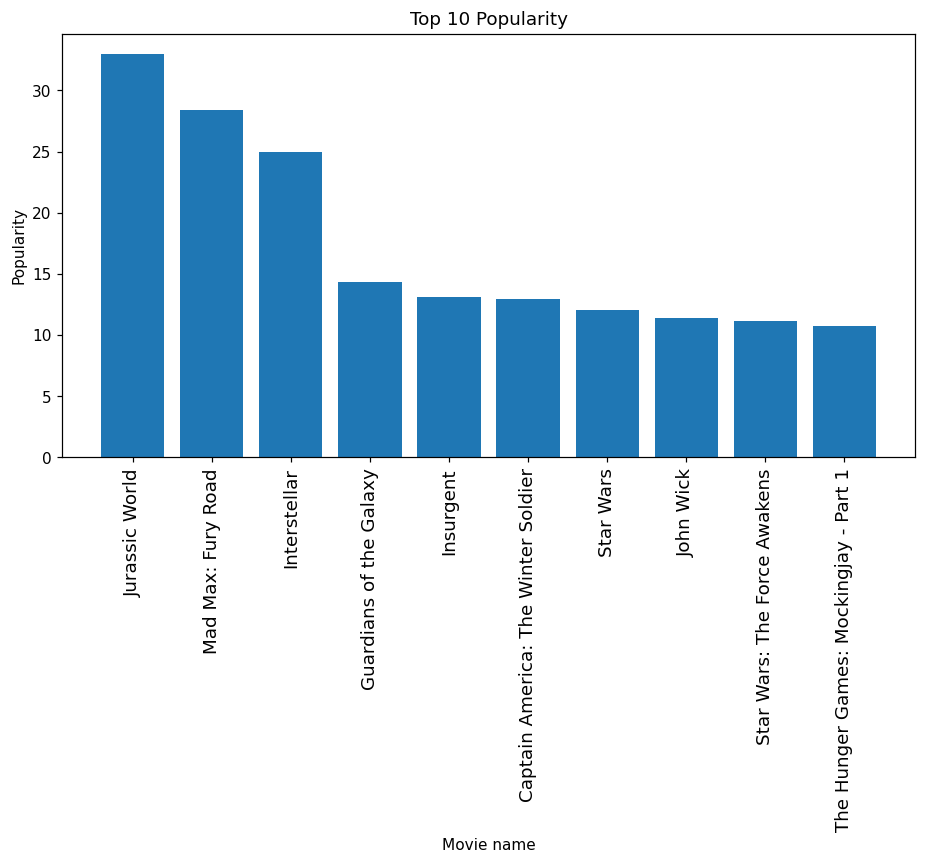

In [85]:
# Plot to show top 10 movies popularity.
movie_name = top_10_popular["original_title"]
popularity = top_10_popular["popularity"]

bar_chart(movie_name,popularity,"Top 10 Popularity","Movie name","Popularity")

<ul>
<li>The top movie popularity is 'Jurassic World'.</li>
</ul>

<a id='Q7'></a>
### Research Question 7  ( Which Top 10 movies had the highest rating by voter?) 

In [76]:
# Top 10 movies by voting
top_rating = top_ten("vote_average")
top_rating

,original_title,vote_average
4178,The Shawshank Redemption,8.4
7948,Stop Making Sense,8.4
7269,The Godfather,8.3
650,Whiplash,8.2
2409,Fight Club,8.1
2875,The Dark Knight,8.1
4177,Pulp Fiction,8.1
4179,Forrest Gump,8.1
9758,The Godfather: Part II,8.1
10222,Schindler's List,8.1


<a id='Q8'></a>
### Research Question 8  ( Which year has the highest number of movie released ?) 

In [77]:
# Group data by "release_year" to find movie name.
year = tmdb_data.groupby("release_year").count()['original_title']
year.head()

release_year
1960     5
1961    10
1962     7
1963     6
1964     7
Name: original_title, dtype: int64

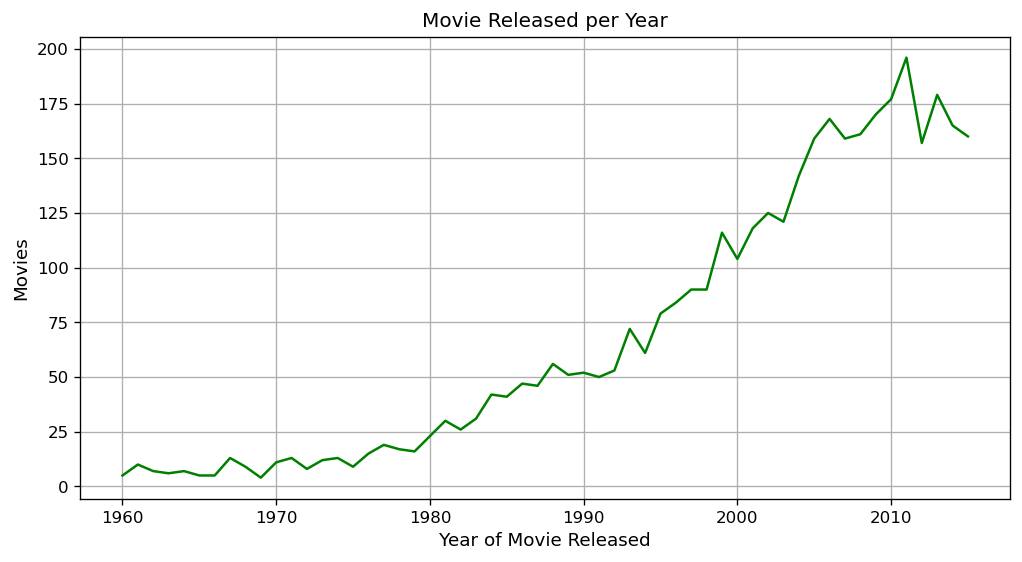

In [78]:
# Plot to show the year hed the heighst number of movies.
plot_chart_years(year,'Movie Released per Year', 'Year of Movie Released', 'Movies',)

<a id='Q9'></a>
### Research Question 9  ( Which year make most profits ?) 

In [79]:
# Group data by "release_year" to find profits.
year = tmdb_data.groupby("release_year").sum()['profit_earned']
year.head()

C:\Users\Aboukhadra\AppData\Local\Temp\ipykernel_480\211687142.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year = tmdb_data.groupby("release_year").sum()['profit_earned']


release_year
1960    108198052
1961    299083188
1962    166879846
1963    115411882
1964    294678387
Name: profit_earned, dtype: int64

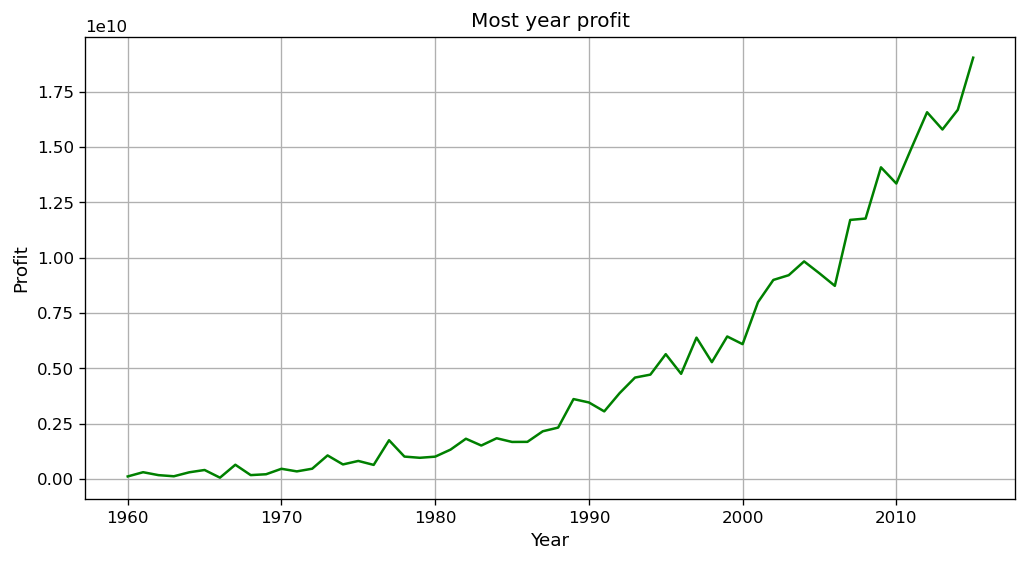

In [80]:
# Plot to show mos year profit
plot_chart_years(year,'Most year profit', 'Year', 'Profit')

<a id='Q9'></a>
### Research Question 9  (What is the top 10 runtime movies ?) 

In [81]:
# Top 10 runtime movies.
runtime = top_ten('runtime')
runtime

,original_title,runtime
2107,Carlos,338.0
10443,Cleopatra,248.0
7332,Heaven's Gate,219.0
9850,Lawrence of Arabia,216.0
5065,Gods and Generals,214.0
3110,Jodhaa Akbar,213.0
8282,Malcolm X,202.0
4949,The Lord of the Rings: The Return of the King,201.0
9758,The Godfather: Part II,200.0
10716,The Greatest Story Ever Told,199.0


<a id='Q10'></a>
### Research 10  (Correlation) 

#### Correlation between Profit and revenue

AxesSubplot(0.125,0.11;0.775x0.77)


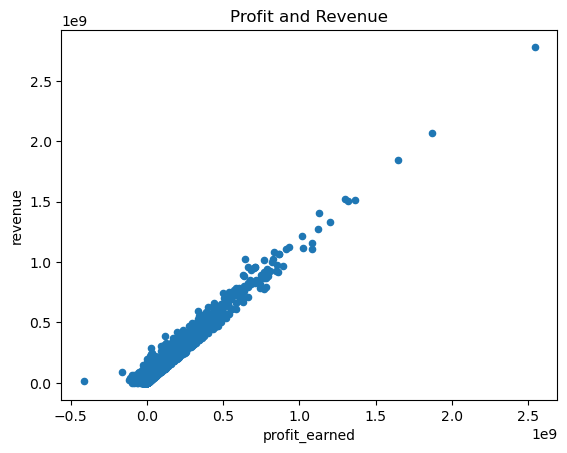

In [82]:
corr1 = tmdb_data.plot(x='profit_earned', y='revenue', kind='scatter', title = 'Profit and Revenue')
print(corr1)

<ul>
<li>There is a strong positive correlation between profit earned and revenue.</li>
<ul>

#### Correlation between Profit and budget

AxesSubplot(0.125,0.11;0.775x0.77)


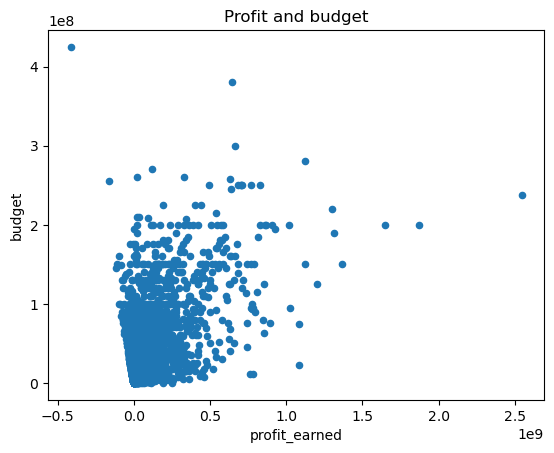

In [83]:
corr2 = tmdb_data.plot(x='profit_earned', y='budget', kind='scatter', title = 'Profit and budget')
print(corr2)

<ul>
<li>There is a weak positive correlation between profit earned and budget.</li>
</ul>

<a id='conclusions'></a>
## Conclusions



<li>After analysing The Movie Database (TMDb) i found this results :</li>
<ol>
<li>Movie earned most profit is 'Avatar' and the lowest profit is 'The Warrior's Way'.</li>
<li>Movie with most budget is 'The Warrior's Way' and the lowest budget is 'Love, Wedding, Marriage'.</li>
<li>The most popular genre of movies is 'Action'.</li>
<li>The most genre make profit is "Action" because it is the most popular.</li>    
<li>The most gerne of movies is 'Drama'.</li>
<li>The top movie popularity is 'Jurassic World'.</li>
<li>Movies released increased per year from 1960 to 2015 and its profit increased also.</li>
<li>There is a strong positive correlation between profit earned and revenue.</li>    
<li>There is a weak correlation between profit earned and budget.</li>       
</ol>

<a id='limitations'></a>
## Limitations
<ul>
<li>I had to drop so many rows because they were filled with missing values.</li>
<li>I noticed columns like budget and revenue had no currency unit. I think that there isa difffernt movies might have a budget with different currency unit.</li> 
<li>I added columns like "profit _earned" and "genre" to answer some questions.</li>     
</ul>
